# $\mathcal{l}_2$ penalty method algorithm

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import time
from copy import deepcopy

#### Testing functions

In [2]:
# def alpha(k): return 2**k
# def xplus(x): return max(x,0)
# def Norm(x): return np.linalg.norm(x)

# def obj_func(x): return x[0]**2 + x[1]**2 + x[0] - x[1]
# def G(x): return np.array([1 -x[0], -x[1] ])
# def P(x,k): return obj_func(x) + (alpha(k)/2)*xplus(G(x)[0])**2 + (alpha(k)/2)*xplus(G(x)[1])**2
# def P_grad(x,k):
#     g1 = 2*x[0] + 1 - alpha(k)*xplus(1-x[0])
#     g2 = 2*x[1] - 1 - alpha(k)*xplus(-x[1])
#     return np.array( [ g1 , g2 ] )
# def stepsize(x1, x0,k): # Barzilai-Borwein step-size (quasi-newton origin)
#     nom = np.dot(x1 - x0, P_grad(x1,k) - P_grad(x0,k))
#     denom = np.linalg.norm( P_grad(x1,k) - P_grad(x0,k) )**2
#     return nom/denom
# # Note: Direction is just steepest descent
# def GD(x, lam ,k):
#     return x - lam*P_grad(x,k)
# def Descent(x, init_step, EPSILON):
#     x0 = np.array(x)
#     k = 1
#     x_list = [x0]
#     lam = init_step
#     x1 = GD(x0, lam ,k)
#     x_list.append(x1)
#     N = Norm(x1 - x0)
#     Norm_list = [N]
    
#     while N > EPSILON:
#         lam = stepsize(x1, x0, k)
#         x0 = x1
#         x1 = GD(x0, lam, k)
#         x_list.append(x1)
#         N = Norm(x1 - x0)
#         Norm_list = [N]
#         k += 1
    
#     return np.array([ x_list, Norm_list ])

## The real deal

In [3]:
def alpha(k): return 2**k
def xplus(x): return max(x,0)
def Norm(x): return np.linalg.norm(x)

In [4]:
FIELDSIZE = 100
SCALE = 100

In [5]:
# calculate a squared norm of s - x, as in our obj func and constraints
def norm_func(s, x):
    return (s[0] - x[0])**2 + (s[1] - x[1])**2

# create a list of the squared euclidean distance from s to each point x in X
def X_norms_sqrd(s, X): return [norm_func(s,i) for i in X]

# find the largest distance
def beta(s, X): return max(X_norms_sqrd(s, X))

# create an objective function
def obj_func(s, X, b): 
    x_list = X_norms_sqrd(s,X)
    return sum(x_list) + max(x_list)

# create the g constraints
def G(s,X, b): return [ norm_func(s, X[i]) - b for i in range(len(X))]

# l2-penalty function
def P(s,X,k, b): 
    return obj_func(s,X, b) + (alpha(k)/2)*sum([ xplus(G(s,X, b)[i])**2 for i in range(len(X)) ])

def P_grad(s,X,k, b):
    s_minus_x_0 = np.array([ s[0] - X[i][0] for i in range(len(X)) ])
    G_sum_0 = np.array([ (s[0] - X[i][0])**2 - b for i in range(len(X))])
    mult_terms_0 = [xplus(s_minus_x_0[i] * G_sum_0[i]) for i in range(len(X))]
    
    g1 = 2*sum(s_minus_x_0) + 2*alpha(k)*sum( mult_terms_0)
    
    s_minus_x_1 = np.array([ s[1] - X[i][1] for i in range(len(X)) ])
    G_sum_1 = np.array([ (s[1] - X[i][1])**2 - b for i in range(len(X))])
    mult_terms_1 = [xplus(s_minus_x_1[i] * G_sum_1[i]) for i in range(len(X))]
    
    g2 = 2*sum(s_minus_x_1) + 2*alpha(k)*sum( mult_terms_1)
    
    return np.array( [g1 , g2])

In [6]:
def stepsize(s1, s0, X, k, b): # Barzilai-Borwein step-size (quasi-newton origin)
    nom = np.dot(s1 - s0, P_grad(s1, X ,k, b) - P_grad(s0, X ,k, b))
    denom = np.linalg.norm( P_grad(s1, X ,k, b) - P_grad(s0, X ,k, b) )**2
    return nom/denom
# Note: Direction is just steepest descent
def GD(s, X, lam ,k, b):
    return s - lam*P_grad(s, X ,k, b)

In [7]:
# generate FIELDSIZE random pts in R^2 \in (0,SCALE)
X_points = [ [ random.random()*SCALE, random.random()*SCALE ] for i in range(FIELDSIZE) ] 

# generate an inital point S in the plain of X
S_0 = [ random.random()*SCALE, random.random()*SCALE ]

In [14]:
X_points

[[88.4310889797189, 10.134113403745658],
 [43.85172915309193, 64.3712204739313],
 [26.86121591359768, 67.46172415070428],
 [19.752658769944464, 33.46076015931998],
 [83.2139581906571, 99.83291945462128],
 [42.923392097305246, 77.85668712908233],
 [61.71273730628209, 30.94332922269707],
 [58.74532383490189, 65.58124313071689],
 [69.86349192832418, 69.2312641372822],
 [83.10285413700113, 19.67355980781953],
 [83.19178480696878, 49.798913390747025],
 [91.77188203756921, 43.8166074259666],
 [10.510893335236604, 2.796764227988724],
 [69.48261230199992, 42.17215185189421],
 [51.854471539994876, 38.598575590107366],
 [94.21684802910737, 15.828995365523578],
 [49.95645736823726, 92.26539499489215],
 [81.12474227052904, 17.639848888489706],
 [76.52754589144621, 99.792085736659],
 [18.187726741412703, 7.56784452799425],
 [13.431977485701251, 28.280251636793285],
 [55.99804961852539, 54.088447800454695],
 [36.559753334073456, 20.98231818069648],
 [56.17074593797835, 19.57347651173246],
 [42.92113

In [8]:
S_0

[84.23746615462142, 69.18342000087097]

In [9]:
def Descent(s, X, init_step, EPSILON):
    b = beta(s, X)
    s0 = np.array(s)
    k = 1
    s_list = [s0]
    lam = init_step
    s1 = GD(s0, X, lam ,k, b)
    s_list.append(s1)
    N = Norm(P_grad(s1, X, k, b))
    Norm_list = [N]

    while N > EPSILON:
        b = beta(s1, X)
        lam = stepsize(s1, s0, X, k, b)
        s0 = s1
        s1 = GD(s0, X, lam, k, b)
        s_list.append(s1)
        N = Norm(P_grad(s1, X, k, b))
        Norm_list.append(N)
        k += 1
    
    return np.array([ s_list, Norm_list ])

In [10]:
TEST = Descent( S_0, X_points, 0.1, 1e-10)

<ipython-input-6-9a62d56d6056>:4: RuntimeWarning: invalid value encountered in double_scalars
  return nom/denom
<ipython-input-9-dfde80cf9b4e>:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([ s_list, Norm_list ])


In [11]:
TEST[0]

[array([84.23746615, 69.18342   ]),
 array([ -554945.97391658, -1776387.91211334]),
 array([  456575.30017287, -1460167.03966789]),
 array([  456575.30017296, -1227124.63380225]),
 array([  456575.30017291, -1460167.03966773]),
 array([  456575.3001729 , -1558754.97379061]),
 array([  456575.3001729 , -1636173.59868028]),
 array([  456575.3001729 , -1707698.49898469]),
 array([  456575.3001729 , -1775386.56259121]),
 array([  456575.30017289, -1839912.20714095]),
 array([  456575.30017289, -1901718.29882804]),
 array([  456575.30017289, -1961145.48707497]),
 array([  456575.30017289, -2018465.97842477]),
 array([  456575.30017289, -2073902.00148117]),
 array([  456575.30017289, -2127638.06773247]),
 array([  456575.30017289, -2179829.54705706]),
 array([  456575.30017289, -2230608.85149104]),
 array([  456575.30017289, -2280090.00893664]),
 array([  456575.30017289, -2328372.20886095]),
 array([  456575.30017289, -2375542.23614739]),
 array([  456575.30017289, -2421676.64844234]),
 arr

In [14]:
S_0

[17.780363599386405, 13.494794438567936]

In [13]:
beta(S_0,X_points)

9842.795604399213

In [32]:
TEST[1]

[476970087.2422342,
 1.0698726838967752e+21,
 385931387.2766943,
 437319319.2754342,
 445342292.5792132,
 452006478.6346192,
 458535250.3698551,
 464963100.61685514,
 471295345.37871695,
 477536276.69511473,
 483689855.98179245,
 489759760.9276956,
 495749413.7663722,
 501662005.749987,
 507500518.6565034,
 513267743.7660212,
 518966298.6636311,
 524598642.1675687,
 530167087.633823,
 535673814.84932303,
 541120880.6936514,
 546510228.7226006,
 551843697.804706,
 557123029.9233605,
 562349877.2415498,
 567525808.5131134,
 572652314.9133434,
 577730815.3522742,
 582762661.3259839,
 587749141.354337,
 592691485.0476639,
 597590866.8398223,
 602448409.4206449,
 607265186.8969866,
 612042227.7082869,
 616780517.3196468,
 621481000.7129331,
 626144584.6942004,
 630772140.0337979,
 635364503.4538083,
 639922479.4760007,
 644446842.1421077,
 648938336.6171097,
 653397680.685133,
 657825566.1466736,
 662222660.1250046,
 666589606.2889211,
 670927025.998301,
 675235519.3783665,
 679515666.32803

In [19]:
Norm(np.array([3.34925418e+19, 3.40957974e+19]))

4.779407658451614e+19

In [28]:
min(TEST[1])

15495236.68030372

In [27]:
TEST[0]

[array([55.46351128, 43.23950762]),
 array([-1451068.93123418, -1892505.29889845]),
 array([-69049.49961275, -90075.08936501]),
 array([52.64123141, 47.94606498]),
 array([-62102.27050427, -67130.07206428]),
 array([-56658.25742519, -61246.09605805]),
 array([52.64123141, 47.94606498]),
 array([-55443.07035775, -59932.70252906]),
 array([-54854.79885536, -59296.88932382]),
 array([52.64123141, 47.94606498]),
 array([-54709.67453492, -59140.03664748]),
 array([-54637.39967545, -59061.92082873]),
 array([52.64123142, 47.94606499]),
 array([-54619.36075479, -59042.42408539]),
 array([-54610.3457585 , -59032.68053388]),
 array([52.64123128, 47.94606484]),
 array([-54608.09254766, -59030.24507986]),
 array([-54606.96597505, -59029.02746224]),
 array([52.6412319 , 47.94606551]),
 array([-54606.68400666, -59028.7233733 ]),
 array([-54606.5431898 , -59028.57117619]),
 array([52.64124164, 47.94607604]),
 array([-54606.50277713, -59028.53794612]),
 array([-54606.48517509, -59028.51892156]),
 arr

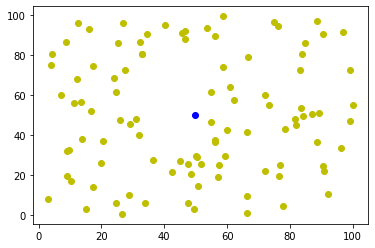

In [12]:
x_ax = [X_points[i][0] for i in range(len(X_points))]
y_ax = [X_points[i][1] for i in range(len(X_points))]
plt.scatter(x_ax, y_ax, c ='y')
plt.scatter(TEST[0][-3][0],TEST[0][-3][1], c = 'b' )
plt.show()

In [44]:
TEST[0][-1]

array([289.60201268, 302.57110591])

In [31]:
P_grad(TEST[0][-1], X_points, 1)

array([48557.52865815, 51095.37592916])

In [35]:
TEST[0][0][0]

5

In [12]:
x0 = np.array([5,5])
EPSILON = 1e-10
k = 1
# x0 = np.array([random.randrange(1,20), random.randrange(0,20)])
print("x:", x0)
print("Gradient", P_grad(x0,k))
lam = 0.1 #random.random() + 1e-12
print('stepsize:',lam)
x1 = GD(x0, lam,k)
print("x:", x1)
print("Gradient", P_grad(x1,k))
N = Norm(x1 - x0)
print("Squared Norm:",N)
while N > EPSILON:
    lam = stepsize(x1,x0, k)
    print("stepsize:", lam)
    x0 = x1
    x1 = GD(x0, lam, k)
    print("x:", x1)
    print("Gradient", P_grad(x1,k))
    k += 1
    print("k=", k)
    N = Norm(x1 - x0)
    print("Squared Norm:",N)

x: [5 5]
Gradient [11  9]
stepsize: 0.1
x: [3.9 4.1]
Gradient [8.8 7.2]
Squared Norm: 1.42126704035519
stepsize: 0.5000000000000002
x: [-0.5  0.5]
Gradient [-3.00000000e+00 -3.55271368e-15]
k= 2
Squared Norm: 5.6850681614207605
stepsize: 0.33608978145304175
x: [1.51653869 0.5       ]
Gradient [ 4.03307738e+00 -1.11022302e-15]
k= 3
Squared Norm: 2.016538688718255
stepsize: 0.1257736516357206
x: [1.00928382 0.5       ]
Gradient [ 3.01856764e+00 -7.77156117e-16]
k= 4
Squared Norm: 0.5072548690896048
stepsize: 0.5
x: [-0.5  0.5]
Gradient [-24.   0.]
k= 5
Squared Norm: 1.509283819628648
stepsize: 0.02958303005095145
x: [0.91998544 0.5       ]
Gradient [0.27950504 0.        ]
k= 6
Squared Norm: 1.4199854424456697
stepsize: 0.015151515151515152
x: [0.95454545 0.5       ]
Gradient [2.66453526e-15 0.00000000e+00]
k= 7
Squared Norm: 0.034560012099784876
stepsize: 0.007692307692307694
x: [0.97692308 0.5       ]
Gradient [-3.55271368e-15  0.00000000e+00]
k= 8
Squared Norm: 0.022377622377622308
ste

In [65]:
Norm([5.12295895e-09, 1.79508469e-01])**2

0.03222329044272399

# OLD CODE

## Failed $\log$ barrier penalty method algorithm

In [ ]:
def obj_func(x): return x[0]**2 + x[1]**2 + x[0] - x[1]
def Gs(x):
    g1, g2 = 1 - x[0] , -x[1]
    return np.array([g1,g2])
def P(x,k):
    return obj_func(x) - (1/k)*np.log(-Gs(x))
def P_grad(x,k):
    p1 = 2*x[0] + 1 + 1/(k*(1-x[0]))
    p2 = 2*x[1] -1 + 1/(k*x[1])
    return np.array([p1,p2])

In [ ]:
# testing
def obj_func(x): return x[0]**2 + x[1]**2 + x[0] - x[1]

In [ ]:
def Gs(x):
    g1, g2 = 1 - x[0] , -x[1]
    return np.array([g1,g2])

In [ ]:
pre_lim_x_test = np.array([2,1.5])
print(obj_func(pre_lim_x_test))
Gs(pre_lim_x_test)

In [ ]:
def P(x,k):
    return obj_func(x) - (1/k)*np.log(-Gs(x))

In [ ]:
(1/k)*np.log(Gs(x1))

In [ ]:
def P_grad(x,k):
    p1 = 2*x[0] + 1 + 1/(k*(1-x[0]))
    p2 = 2*x[1] -1 + 1/(k*x[1])
    return np.array([p1,p2])

In [ ]:
P_grad(pre_lim_x_test,1)

In [ ]:
def Norm(x): return np.linalg.norm(x)

def stepsize(x1, x0,k):
    nom = np.dot(x1 - x0, P_grad(x1,k) - P_grad(x0,k))
    denom = np.linalg.norm( P_grad(x1,k) - P_grad(x0,k) )**2
    return nom/denom

def GD(x, lam ,k):
    return x - lam*P_grad(x,k)

In [ ]:
x = pre_lim_x_test
EPSILON = 1e-3
k = 1
# x0 = np.array([random.randrange(1,20), random.randrange(0,20)])
x0 = x
print("x:", x0)
print("Gradient", P_grad(x0,k))
lam = random.random() + 1e-12


In [ ]:
(1/k)*np.log(Gs(x0))

In [ ]:
Gs(x0)

In [ ]:
x1 = GD(x0, lam,k)
print("x:", x1)
print("Gradient", P_grad(x1,k))
N = Norm(P_grad(x,k))
print("Squared Norm:",N)

In [ ]:
Norm(P_grad([1.0000000001,0.0000000001],k))

In [ ]:
while N > EPSILON:
    lam = stepsize(x1,x0, k)
    print("stepsize:", lam)
    x0 = x1
    x1 = GD(x0, lam, k)
    print("x:", x1)
    print("Gradient", P_grad(x1,k))
    k += 1
    N = Norm(P_grad(x,k))
    print("Squared Norm:",N)
            
           

In [ ]:
k

In [ ]:
FIELDSIZE = 100
NUM_X = 100

X = []

for i in range(FIELDSIZE):
    x_i = np.array([random.randrange(-FIELDSIZE, FIELDSIZE), random.randrange(-FIELDSIZE, FIELDSIZE)])
    X.append(x_i)

In [26]:
random.random()*100

87.18373729622067

Useful code

In [ ]:
S = np.array([random.randrange(-FIELDSIZE, FIELDSIZE), random.randrange(-FIELDSIZE, FIELDSIZE)])
S_data = [S]

def norm_func(s, x):
    return (s[0] - x[0])**2 + (s[1] - x[1])**2

norms = []
for x in X:
    norms.append(norm(S,x))

alpha_index = np.argmax(norms)
alpha = norms[alpha_index]

In [ ]:
lambdas = [0]*len(X)

def obj(s):
    obj_norms = []
    for x in X:
        obj_norms.append(norm(S,x))
    return sum(obj_norms) + alpha

In [ ]:
def conditions(s):
    g = [0]*len(X)
    for i in range(len(X)):
        g[i] = norm(s, X[i]) - alpha
    return g

Useful code

In [ ]:
def lagrange(s):
    G = conditions(s)
    lambda_gs = [0]*len(X)
    for i in range(len(X)):
        lambda_gs[i] = lambdas[i]*G[i]
    return obj(s) + sum(lambda_gs)

In [ ]:
lagrange(S)

In [ ]:
obj(S)

In [ ]:
def grad_lagrange(s):
    gradL = [0, 0]
    for i in range(len(X)):
        gradL[0] += 2*(1+lambdas[i])*(s[0]-X[i][0])
        gradL[1] += 2*(1+lambdas[i])*(s[1]-X[i][1])
    return np.array(gradL)

In [ ]:
G = conditions(S)
G[alpha_index]

In [ ]:
def grad_gl(s):
    gradgL = [0,0]
    for i in range(len(X)):
        gradgL[0] += 2*(s[0] - X[i][0])
        gradgL[1] += 2*(s[1] - X[i][1])
    return np.array(gradgL)

In [ ]:
def Real_norm(s): return np.linalg.norm(s)

In [ ]:
def step(lambdaa):
    return lambdaa - STEPSIZE*grad_gl(S)

In [ ]:
def Backtrack(l1, l2):
    STEPSIZE = np.dot(l2 - l1, 2*(S - ))

In [ ]:
teste = []
L1 = random.randrange(1e6)
L2 = L1 - 5
while Real_norm(grad_lagrange(S)) > 10:
    STEPSIZE = Backtrack(L1, L2)
    lambdas[alpha_index]  = step(lambdas[alpha_index])
    teste.append(lambdas[alpha_index])

In [ ]:
plt.plot(range(len(teste)), teste)
plt.show

In [ ]:
teste[-1]

In [ ]:
teste[0]

In [ ]:
Real_norm(S - np.array(grad_lagrange(S)))

In [ ]:
grad_lagrange(S)

In [ ]:
grad_lagrange(S - 10 * np.array(grad_lagrange(S)))

In [ ]:
STEPSIZE

In [ ]:
random.randrange(1e6)